# USED CARS PRICE PREDICTION - EDA

Dataset source - https://www.kaggle.com/datasets/doaaalsenani/usa-cers-dataset/data

### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix,classification_report

### Load the data

In [2]:
data = pd.read_csv(r"C:\Users\arthi\Downloads\USA_cars_datasets.csv")
df = pd.DataFrame(data)

### Explore the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2499 non-null   int64 
 1   price         2499 non-null   int64 
 2   make          2499 non-null   object
 3   model         2499 non-null   object
 4   year          2499 non-null   int64 
 5   title_status  2499 non-null   object
 6   mileage       2499 non-null   int64 
 7   color         2499 non-null   object
 8   vin           2499 non-null   object
 9   lot           2499 non-null   int64 
 10  state         2499 non-null   object
 11  country       2499 non-null   object
 12  condition     2499 non-null   object
dtypes: int64(5), object(8)
memory usage: 253.9+ KB


In [4]:

df.columns

Index(['Unnamed: 0', 'price', 'make', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

In [5]:
df.head(5)

,Unnamed: 0,price,make,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [6]:
df.tail(5)

,Unnamed: 0,price,make,model,year,title_status,mileage,color,vin,lot,state,country,condition
2494,2494,7800,nissan,versa,2019,clean vehicle,23609,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left
2498,2498,9200,nissan,versa,2018,clean vehicle,31371,silver,3n1cn7ap4jl884311,167762228,florida,usa,21 hours left


In [7]:
df.shape

(2499, 13)


The dataset consists of 2499 rows and 13 columns

In [8]:
df.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [9]:
df['make'].unique()

array(['toyota', 'ford', 'dodge', 'chevrolet', 'gmc', 'chrysler', 'kia',
       'buick', 'infiniti', 'mercedes-benz', 'jeep', 'bmw', 'cadillac',
       'hyundai', 'mazda', 'honda', 'heartland', 'jaguar', 'acura',
       'harley-davidson', 'audi', 'lincoln', 'lexus', 'nissan', 'land',
       'maserati', 'peterbilt', 'ram'], dtype=object)

In [10]:
df['model'].unique()

array(['cruiser', 'se', 'mpv', 'door', '1500', 'pk', 'malibu', 'coupe',
       'wagon', 'forte', 'encore', 'sorento', 'doors', 'chassis', 'q70',
       'camaro', 'convertible', 'vans', 'srw', 'compass', 'enclave',
       '300', 'cherokee', 'pacifica', 'x3', 'equinox', 'challenger', 'm',
       'colorado', 'focus', 'durango', 'escape', 'charger', 'explorer',
       'f-150', '3500', 'caravan', 'van', 'dart', '2500', 'esv',
       'cutaway', 'el', 'edge', 'series', 'flex', 'srx', 'cab', 'pickup',
       'vehicl', 'trax', 'tahoe', 'suburban', 'cargo', 'drw', 'fiesta',
       'impala', 'soul', 'elantra', 'pioneer', 'trail', 'traverse',
       'country', 'sundance', 'road/street', 'nautilus', 'gx', 'q5',
       'gle', 'sportage', '5', 'sport', 'discovery', 'acadia', 'ghibli',
       'glc', 'e-class', 'truck', 'utility', 'limited', 'sl-class',
       'cx-3', '2500hd', 'sonic', 'corvette', 'mdx', 'xt5', 'fusion',
       'mustang', 'passenger', 'volt', 'spark', 'cruze', 'ld', 'journey',
       

In [11]:
df['color'].unique()

array(['black', 'silver', 'blue', 'red', 'white', 'gray', 'orange',
       'brown', 'no_color', 'gold', 'charcoal', 'turquoise', 'beige',
       'green', 'dark blue', 'maroon', 'phantom black', 'yellow',
       'color:', 'light blue', 'toreador red', 'bright white clearcoat',
       'billet silver metallic clearcoat', 'black clearcoat',
       'jazz blue pearlcoat', 'purple',
       'ruby red metallic tinted clearcoat', 'triple yellow tri-coat',
       'competition orange', 'off-white', 'shadow black',
       'magnetic metallic', 'ingot silver metallic', 'ruby red',
       'royal crimson metallic tinted clearcoat', 'kona blue metallic',
       'oxford white', 'lightning blue', 'ingot silver',
       'white platinum tri-coat metallic', 'guard',
       'tuxedo black metallic', 'tan', 'burgundy', 'super black',
       'cayenne red', 'morningsky blue', 'pearl white', 'glacier white'],
      dtype=object)

In [12]:
df['state'].unique()

array(['new jersey', 'tennessee', 'georgia', 'virginia', 'florida',
       'texas', 'california', 'north carolina', 'ohio', 'new york',
       'pennsylvania', 'south carolina', 'michigan', 'washington',
       'arizona', 'utah', 'kentucky', 'massachusetts', 'nebraska',
       'ontario', 'missouri', 'minnesota', 'oklahoma', 'connecticut',
       'indiana', 'arkansas', 'kansas', 'wyoming', 'colorado', 'illinois',
       'wisconsin', 'mississippi', 'maryland', 'oregon', 'west virginia',
       'nevada', 'rhode island', 'louisiana', 'alabama', 'new mexico',
       'idaho', 'new hampshire', 'montana', 'vermont'], dtype=object)

In [13]:
df['country'].unique()

array([' usa', ' canada'], dtype=object)

### Data Cleaning

1. Handling Null Values

In [14]:
df.isnull().sum()

Unnamed: 0      0
price           0
make            0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

2. Drop/Replace/Mapping



In [15]:
#Drop the columns that are of no use
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,price,make,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [16]:
#Replacing the column values
df.replace({'condition': r' left$'},{'condition': ''}, regex = True, inplace = True)
df.head(4)

,price,make,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days
1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days
3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours


In [17]:
df.describe()

,price,year,mileage,lot
count,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,84900.000000,2020.000000,1.017936e+06,1.678055e+08


We can see that few of the cars have price as zero. This isn't practical. So, we need to replace these zero values with a resonably good value. In this case i will replace it with median of price column.

In [18]:
#Replacing the zero price values with median values
median_price = df['price'].median()
df['price'] = df['price'].astype(int)
df['price'].replace(0, median_price, inplace = True)

In [19]:
df.describe()

,price,year,mileage,lot
count,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,19058.467787,2016.714286,5.229869e+04,1.676914e+08
std,11862.212112,3.442656,5.970552e+04,2.038772e+05
min,25.000000,1973.000000,0.000000e+00,1.593488e+08
25%,10800.000000,2016.000000,2.146650e+04,1.676253e+08
50%,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [20]:
#Mapping Datetime to Year column

print("Before mapping:",df.dtypes['year'])

def lookup(a):
    val = {i:pd.to_datetime(i, format = '%Y') for i in a.unique()}
    return a.map(val)

df['modified_year'] = lookup(df['year'])

print("After mapping: ",df.dtypes['modified_year'])

Before mapping: int64
After mapping:  datetime64[ns]


3. Changing Datatypes

In [21]:
# Changing dtype of 'title_status' to Categorical (ordinal)

print("Memory Usage of title_status before: ",df.title_status.memory_usage())
print("Dtype before:", df.dtypes['title_status'] ,", Unique values",df.title_status.unique())

Memory Usage of title_status before:  20120
Dtype before: object , Unique values ['clean vehicle' 'salvage insurance']


In [22]:
lst = ['clean vehicle','salvage insurance']
df['title_status'] = df.title_status.astype(pd.CategoricalDtype(lst,ordered=True))

print("Memory Usage of title_status after: ",df.title_status.memory_usage())
print("Dtype before:", df.dtypes['title_status'] ,", Unique values",df.title_status.unique())

Memory Usage of title_status after:  2751
Dtype before: category , Unique values ['clean vehicle', 'salvage insurance']
Categories (2, object): ['clean vehicle' < 'salvage insurance']


4. Data Standardization and Normalization

In [23]:
#Standardization

df['kilometer'] = 1.609*df['mileage']
df.head(4)

,price,make,model,year,title_status,mileage,color,vin,lot,state,country,condition,modified_year,kilometer
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days,2008-01-01,441054.253
1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days,2011-01-01,306598.168
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days,2018-01-01,63700.310
3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours,2014-01-01,103210.914


In [24]:
#Normalization

df['mileage_mod'] = df['mileage'] / df['mileage'].max()
df['kilometer'] = df['kilometer'] / df['kilometer'].max()
df['price_mod'] = df['price'] / df['price'].max()
df[['mileage_mod','kilometer','price_mod']].head(4)

,mileage_mod,kilometer,price_mod
0,0.269287,0.269287,0.074205
1,0.187194,0.187194,0.034146
2,0.038892,0.038892,0.063015
3,0.063016,0.063016,0.294464


5. Data Bining

It is the process of transforming continous numrical variable into discrete categorical 'bins', for grouped analysis

In [25]:
df.year.value_counts().head(10)

2019    892
2018    395
2017    377
2016    203
2015    196
2014    104
2013     86
2012     72
2020     48
2011     23
Name: year, dtype: int64

In [26]:
val = np.linspace(min(df['year']),max(df['year']),6,dtype='int')
print(val)

group_names = ['1973-1982','1982-1991','1991-2001','2001-2010','2010-2020']

[1973 1982 1991 2001 2010 2020]


In [27]:
df['year_binned'] = pd.cut(df['year'], bins = val, labels = group_names, include_lowest = True)
df.head(4)

,price,make,model,year,title_status,mileage,color,vin,lot,state,country,condition,modified_year,kilometer,mileage_mod,price_mod,year_binned
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days,2008-01-01,0.269287,0.269287,0.074205,2001-2010
1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days,2011-01-01,0.187194,0.187194,0.034146,2010-2020
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days,2018-01-01,0.038892,0.038892,0.063015,2010-2020
3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours,2014-01-01,0.063016,0.063016,0.294464,2010-2020




6. Detecting Outliers

Outliers can play havoc when we want to apply machine learning algorithm for prediction. At the same time outliers can even help us for anomaly detection.

<AxesSubplot:title={'center':'price_mod'}, xlabel='year_binned'>

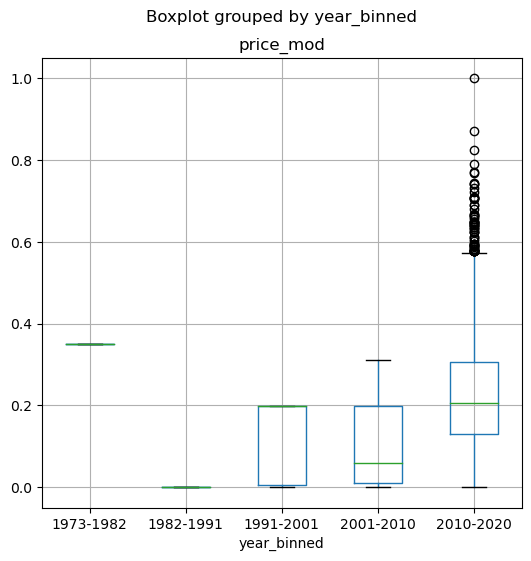

In [28]:
# Let's compare price and year 

df1 = df[['price_mod','year_binned']]
df1.boxplot(column = 'price_mod', by = 'year_binned', figsize = (6,6))

 We will retain the outliers in this scenario as its in acceptable range.

## Data Exploration and Visualization

Plotting the value counts of particular columns

<AxesSubplot:>

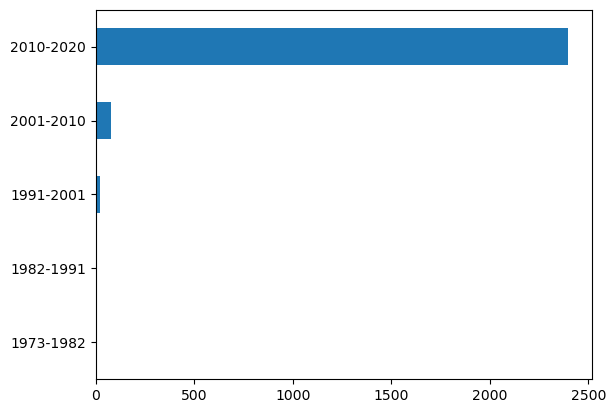

In [29]:
df['year_binned'].value_counts().sort_values().plot(kind = 'barh', title = "")


<AxesSubplot:title={'center':'Value counts of colours of the car'}>

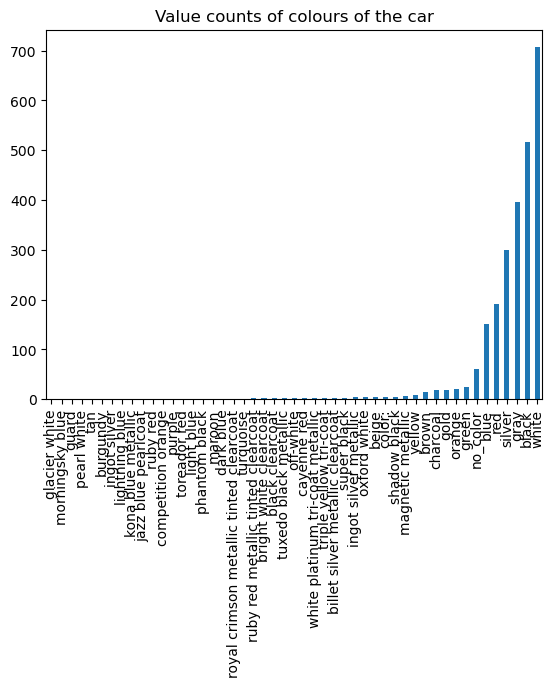

In [30]:
df['color'].value_counts().sort_values().plot(kind = 'bar', title = "Value counts of colours of the car")


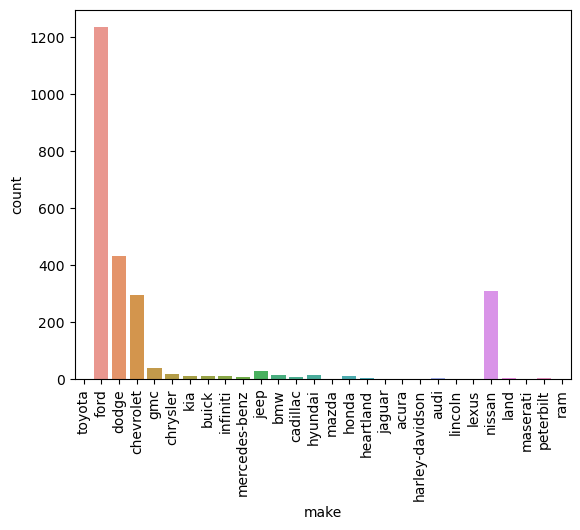

In [31]:
sns.countplot(x=df['make'])
plt.xticks(rotation = 90);

 usa       2492
 canada       7
Name: country, dtype: int64

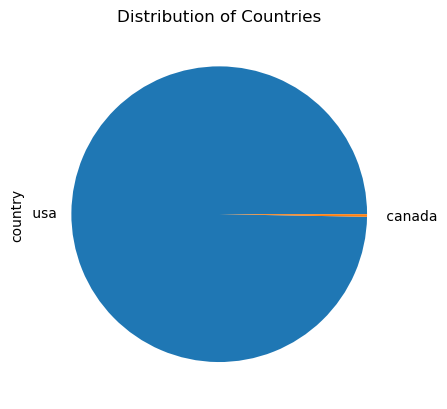

In [32]:
df['country'].value_counts().plot(kind= 'pie', title = 'Distribution of Countries')
df['country'].value_counts()

<AxesSubplot:title={'center':'Value counts of States'}>

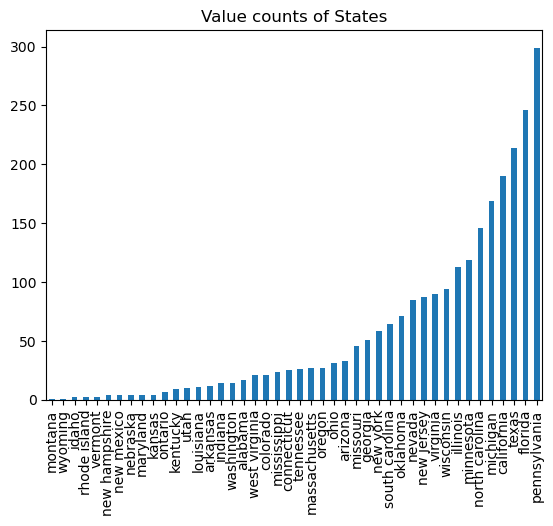

In [33]:
df['state'].value_counts().sort_values().plot(kind = 'bar', title = 'Value counts of States')

<AxesSubplot:title={'center':'Value counts of Car Models'}>

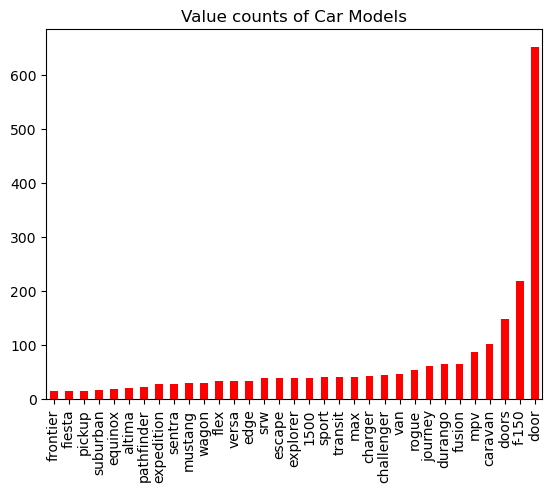

In [34]:
df['model'].value_counts()[0:33].sort_values().plot(kind = 'bar', color= "r", title = "Value counts of Car Models")

Decade wise occupancy
 2010-2020    0.958784
2001-2010    0.031613
1991-2001    0.008804
1973-1982    0.000400
1982-1991    0.000400
Name: year_binned, dtype: float64


Last 5 years
 2019    0.465796
2018    0.206266
2017    0.196867
2016    0.106005
2020    0.025065
Name: year, dtype: float64


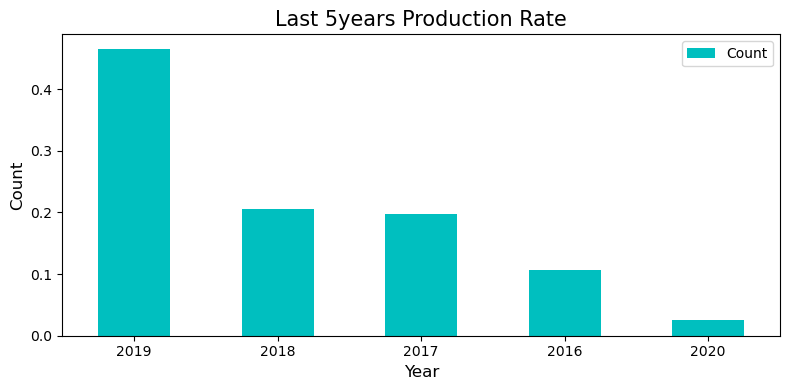

In [35]:
print("Decade wise occupancy\n",df.year_binned.value_counts(normalize=True))

print("\n")

#Let's see for last 5 years
print("Last 5 years\n",df[df.year>2015].year.value_counts(normalize=True))

resdf=df[df.year>2015].year.value_counts(normalize=True)

resdf.plot.bar(x=resdf.index,y=resdf.values,rot=0,figsize=(8,4),color='c',label="Count")
plt.title("Last 5years Production Rate",fontsize=15)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.tight_layout()
plt.legend()
plt.show()

2019 has seen twice the production sales of cars when comapred to 2018. 2018 and 2017 almost had same rate of production of cars

In [36]:
#Finding sales of Top 5 brands 

print(df.make.value_counts(normalize=True).head(5))


ford         0.494198
dodge        0.172869
nissan       0.124850
chevrolet    0.118848
gmc          0.016807
Name: make, dtype: float64


In [37]:
dfpt = df.make.value_counts().reset_index().set_axis(['make','count'], axis=1)

In [38]:
dfpt.head(1)

,make,count
0,ford,1235


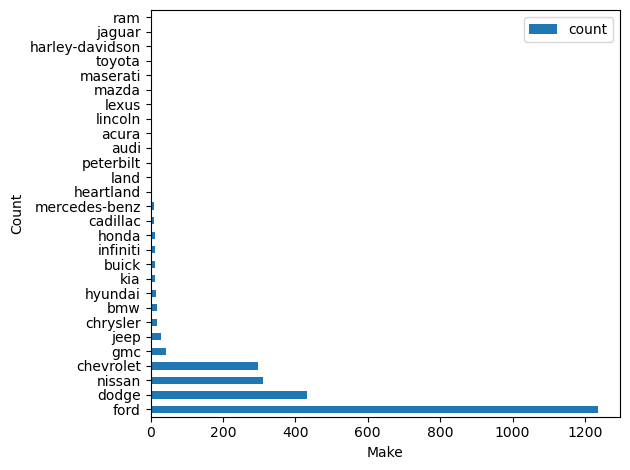

In [39]:
dfpt.plot.barh(x = 'make',y ='count')
plt.xlabel('Make')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Ford has been the leading Brand with more than 1200+ sales. Nissan and Chevrolet had equal occupancy in sales but below Dodge

In [40]:
#lets compare top brands by year
df1 = df[df.year>2015].groupby(['year','make','modified_year']).size().to_frame('Count').reset_index()


#Brands with more than 50 prduction annually 
df2 = df1[df1['Count']>50]

#df3 for Bar Graph
df3 = pd.pivot_table(df2,values = 'Count',index = ['year'],columns = ['make'], fill_value = 0)

#df4 for Line Graph
df4 = pd.pivot_table(df2,values = 'Count',index = ['modified_year'],columns=['make'], fill_value = 0)

Text(0, 0.5, 'Count')

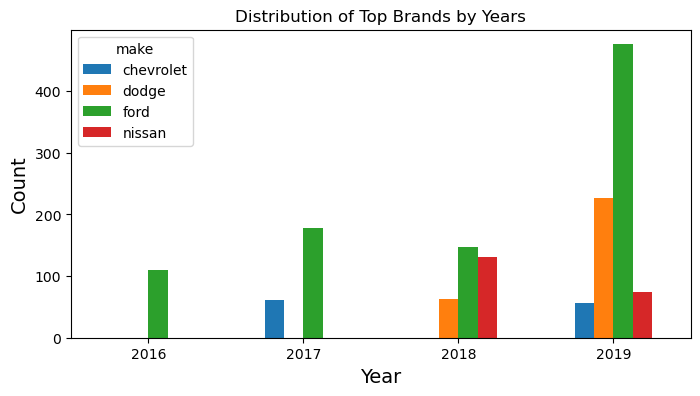

In [41]:
df3.plot.bar(rot=0,figsize=(8,4), title = 'Distribution of Top Brands by Years')
plt.xlabel('Year',fontsize=14)
plt.ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

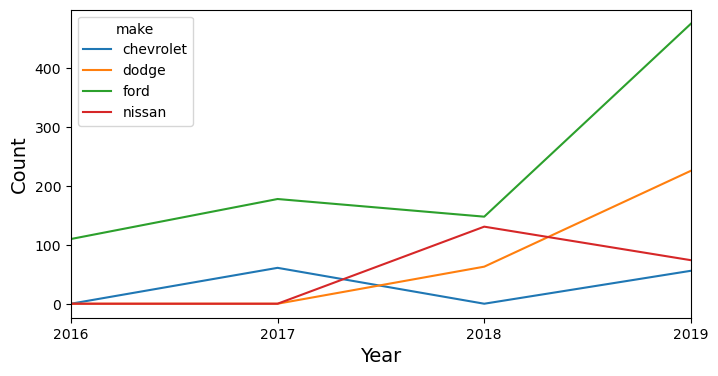

In [42]:
df4.plot.line(rot=0,figsize=(8,4))
plt.xlabel('Year',fontsize=14)
plt.ylabel('Count',fontsize=14)

Ford has the leading sales numbers compared to its competitors. In 2018, Ford and Nissan almost had same number of models rolling out.

In [43]:
#Checking Avg. Price based on State-Wise distribution - USA
df1 = df.copy()
df1['average_year_price']=df1.groupby('year')['price'].transform('mean')
df1.head(5)

,price,make,model,year,title_status,mileage,color,vin,lot,state,country,condition,modified_year,kilometer,mileage_mod,price_mod,year_binned,average_year_price
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days,2008-01-01,0.269287,0.269287,0.074205,2001-2010,8444.722222
1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days,2011-01-01,0.187194,0.187194,0.034146,2010-2020,8737.565217
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days,2018-01-01,0.038892,0.038892,0.063015,2010-2020,19058.339241
3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours,2014-01-01,0.063016,0.063016,0.294464,2010-2020,11979.855769
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours,2018-01-01,0.006537,0.006537,0.326266,2010-2020,19058.339241


In [44]:
df1['average_state_price'] = df1.groupby('state')['price'].transform('mean')
df1 = df1[df1['country'] != ' canada']
df1['average_state_price'].head(3)

0    16209.712644
1    16909.576923
2    16050.313725
Name: average_state_price, dtype: float64

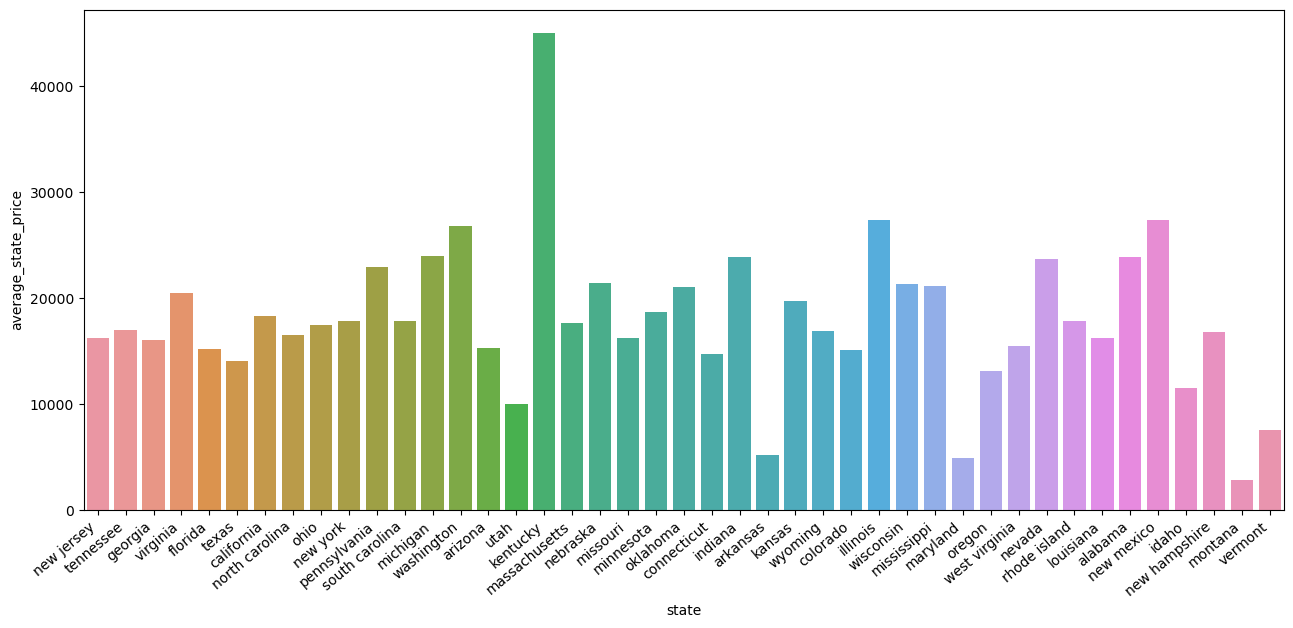

In [45]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x = df1['state'], y=df1['average_state_price'], ax=ax)
plt.tight_layout()
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.show()

In [46]:
#Checking Avg. Price based on Vehicle Color - USA
df1 = df.copy()
df1['average_color_price'] = df1.groupby('color')['price'].transform('mean')
df1 = df1[df1['country'] != ' canada']
df1.head(5)

,price,make,model,year,title_status,mileage,color,vin,lot,state,country,condition,modified_year,kilometer,mileage_mod,price_mod,year_binned,average_color_price
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days,2008-01-01,0.269287,0.269287,0.074205,2001-2010,20486.046512
1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days,2011-01-01,0.187194,0.187194,0.034146,2010-2020,17728.563333
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days,2018-01-01,0.038892,0.038892,0.063015,2010-2020,17728.563333
3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours,2014-01-01,0.063016,0.063016,0.294464,2010-2020,17864.569536
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours,2018-01-01,0.006537,0.006537,0.326266,2010-2020,19211.375000


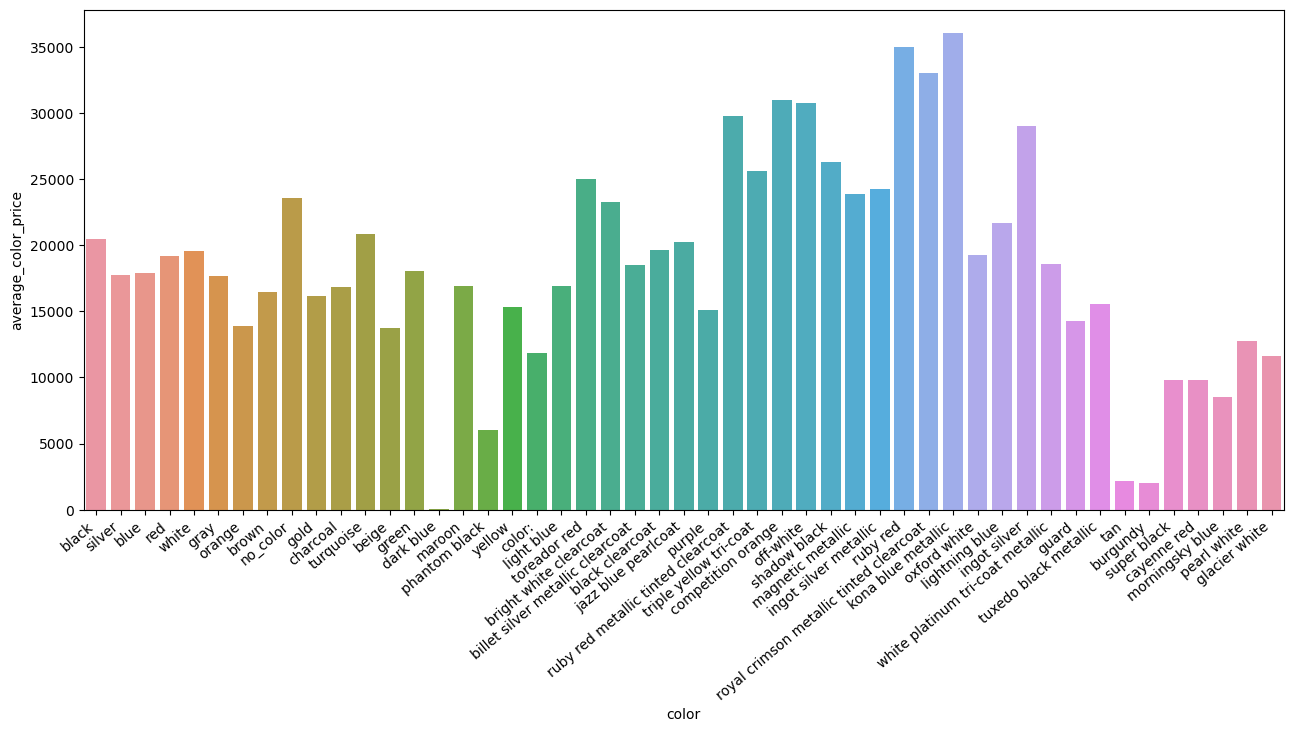

In [47]:
fig = plt.figure(figsize = (12, 5))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x = df1['color'], y = df1['average_color_price'], ax = ax)
plt.tight_layout()
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.show()

<AxesSubplot:xlabel='mileage', ylabel='price'>

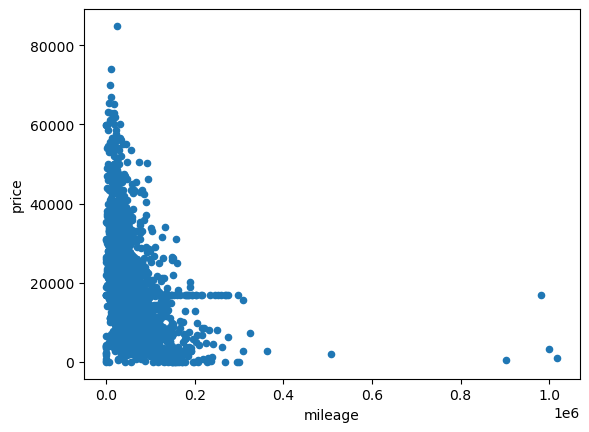

In [48]:
#Price dependancy on Mileage
df.plot.scatter(x="mileage", y="price")

Most cars ranging upto 20000 dollars have a better mileage between 0.1 to 0.3. Cars ranging 20000 dollars and above have mileage less than 0.2

Note: Mileage column had been normalized ranging from (0 to 1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'peterbilt'),
  Text(1, 0, 'jaguar'),
  Text(2, 0, 'acura'),
  Text(3, 0, 'heartland'),
  Text(4, 0, 'hyundai'),
  Text(5, 0, 'honda'),
  Text(6, 0, 'toyota'),
  Text(7, 0, 'jeep'),
  Text(8, 0, 'ram'),
  Text(9, 0, 'nissan'),
  Text(10, 0, 'gmc'),
  Text(11, 0, 'kia'),
  Text(12, 0, 'infiniti'),
  Text(13, 0, 'mazda'),
  Text(14, 0, 'dodge'),
  Text(15, 0, 'chevrolet'),
  Text(16, 0, 'audi'),
  Text(17, 0, 'chrysler'),
  Text(18, 0, 'buick'),
  Text(19, 0, 'mercedes-benz'),
  Text(20, 0, 'ford'),
  Text(21, 0, 'land'),
  Text(22, 0, 'cadillac'),
  Text(23, 0, 'lincoln'),
  Text(24, 0, 'bmw'),
  Text(25, 0, 'maserati'),
  Text(26, 0, 'lexus'),
  Text(27, 0, 'harley-davidson')])

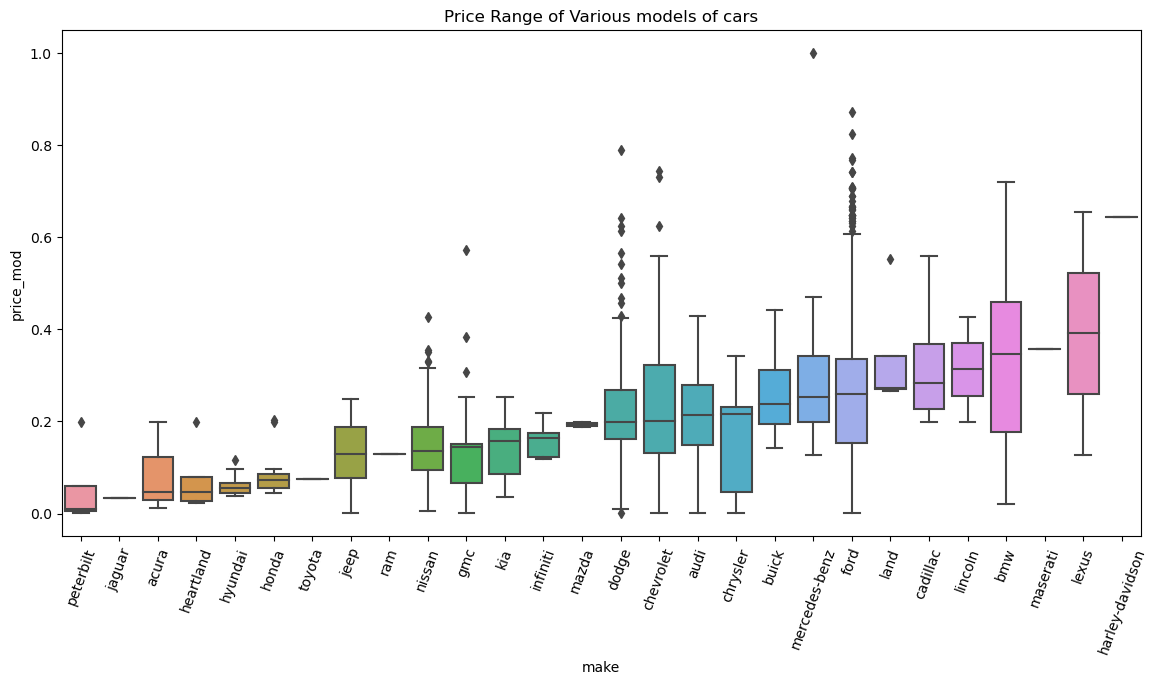

In [49]:
#Price range of various Models of cars
plt.figure(figsize=(12,6))
plt.title('Price Range of Various models of cars')
sorted_nb = df.groupby(['make'])['price_mod'].median().sort_values()
sns.boxplot(x=df['make'], y=df['price_mod'], order=list(sorted_nb.index))
plt.tight_layout()
plt.xticks(rotation=70)


In [50]:
df.sample(5)

,price,make,model,year,title_status,mileage,color,vin,lot,state,country,condition,modified_year,kilometer,mileage_mod,price_mod,year_binned
804,27300,chevrolet,ld,2019,clean vehicle,25427,black,2gcvkpec4k1105269,167805483,indiana,usa,2 days,2019-01-01,0.024979,0.024979,0.321555,2010-2020
466,25,chevrolet,door,2007,salvage insurance,267834,black,3gnfk12387g179905,167650490,texas,usa,17 hours,2007-01-01,0.263115,0.263115,0.000294,2001-2010
153,37000,chevrolet,door,2015,clean vehicle,45787,white,1gc1kwegxff145382,167765217,washington,usa,21 hours,2015-01-01,0.044980,0.044980,0.435807,2010-2020
2383,18900,nissan,rogue,2019,clean vehicle,20508,silver,5n1at2mt7kc832007,167615753,minnesota,usa,14 hours,2019-01-01,0.020147,0.020147,0.222615,2010-2020
1067,24000,dodge,door,2012,clean vehicle,88539,white,3c63drgl5cg107218,167744350,mississippi,usa,21 hours,2012-01-01,0.086979,0.086979,0.282686,2010-2020


In [51]:
#Labelling the categorical values to drwa a corralation between the values in the dataset

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["make_num"] = lb_make.fit_transform(df["make"])
df["model_num"] = lb_make.fit_transform(df["model"])
df["title_num"] = lb_make.fit_transform(df["title_status"])
df["color_num"] = lb_make.fit_transform(df["color"])
df["state_num"] = lb_make.fit_transform(df["state"])
df["country_num"] = lb_make.fit_transform(df["country"])
df.head()

,price,make,model,year,title_status,mileage,color,vin,lot,state,...,kilometer,mileage_mod,price_mod,year_binned,make_num,model_num,title_num,color_num,state_num,country_num
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,...,0.269287,0.269287,0.074205,2001-2010,27,25,0,2,24,1
1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,...,0.187194,0.187194,0.034146,2010-2020,8,92,0,39,35,1
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,...,0.038892,0.038892,0.063015,2010-2020,7,75,0,39,7,1
3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,...,0.063016,0.063016,0.294464,2010-2020,8,32,0,4,39,1
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,...,0.006537,0.006537,0.326266,2010-2020,5,0,0,34,6,1


In [52]:
df2 = df[['price', 'make_num', 'model_num', 'year', 'title_num', 'color_num', 'state_num', 'country_num']]
df2.head(5)

,price,make_num,model_num,year,title_num,color_num,state_num,country_num
0,6300,27,25,2008,0,2,24,1
1,2899,8,92,2011,0,39,35,1
2,5350,7,75,2018,0,39,7,1
3,25000,8,32,2014,0,4,39,1
4,27700,5,0,2018,0,34,6,1


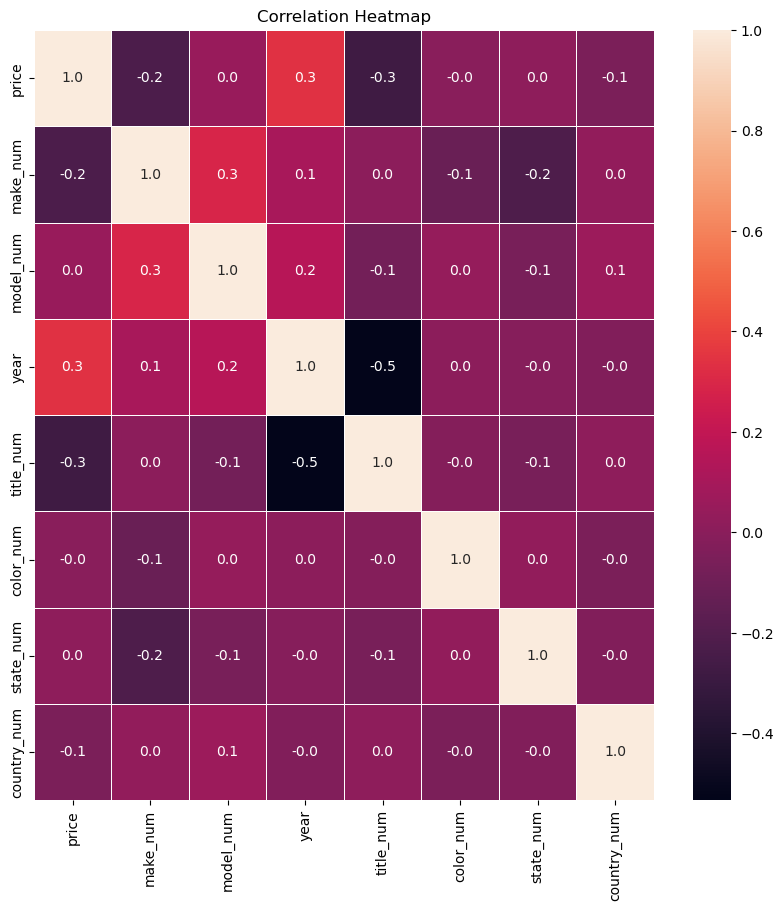

In [53]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df2.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation Heatmap')
plt.show()

## Model Building and Evaluation

#### Feature Engineering

In [134]:
#Creating a dataframe df3 with only the requried columns 
df3 = df[['price','make','model','year','mileage','color','state','country','title_status']]
df3.head(5)

,price,make,model,year,mileage,color,state,country,title_status
0,6300,toyota,cruiser,2008,274117,black,new jersey,usa,clean vehicle
1,2899,ford,se,2011,190552,silver,tennessee,usa,clean vehicle
2,5350,dodge,mpv,2018,39590,silver,georgia,usa,clean vehicle
3,25000,ford,door,2014,64146,blue,virginia,usa,clean vehicle
4,27700,chevrolet,1500,2018,6654,red,florida,usa,clean vehicle


In [138]:
df3['title_status'] = df3['title_status'].astype('str')


In [139]:
#Splitting the dataframe into categorical and numeric features for further analysis
categorical_features=[feature for feature in df3.columns if df3[feature].dtype=='O']

numerical_features=[feature for feature in df3.columns if df3[feature].dtype!='O']

In [140]:
categorical_features

['make', 'model', 'color', 'state', 'country', 'title_status']

#### Splitting the dataset

In [141]:
#Splitting the dataframe for training and testing
X=df3.drop('price',axis=1)
y=df3['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

train_set=pd.concat([X_train,y_train],axis=1)
test_set=pd.concat([X_test,y_test],axis=1)

In [142]:
for feature in categorical_features:
    feature_labels = train_set.groupby(feature)['price'].mean().sort_values().index
    feature_labels = {k:i for i,k in enumerate(feature_labels,0)}
    train_set[feature] = train_set[feature].map(feature_labels)
    test_set[feature] = test_set[feature].map(feature_labels)

test_set.dropna(inplace = True)

test_set



,make,model,year,mileage,color,state,country,title_status,price
53,20,14.0,2017,44794,19.0,9.0,0,1,7760
2391,10,42.0,2019,30645,20.0,23.0,0,1,15900
2310,10,34.0,2012,117844,19.0,14.0,0,0,2900
728,18,85.0,2015,69377,8.0,12.0,0,1,29000
850,17,88.0,2019,41198,20.0,38.0,0,1,29300
...,...,...,...,...,...,...,...,...,...
2356,10,51.0,2019,14470,19.0,23.0,0,1,20500
2285,10,31.0,2018,43187,19.0,18.0,0,1,12500
1165,17,48.0,2019,30731,26.0,14.0,0,1,16000
768,18,35.0,2018,45836,26.0,9.0,0,1,10200


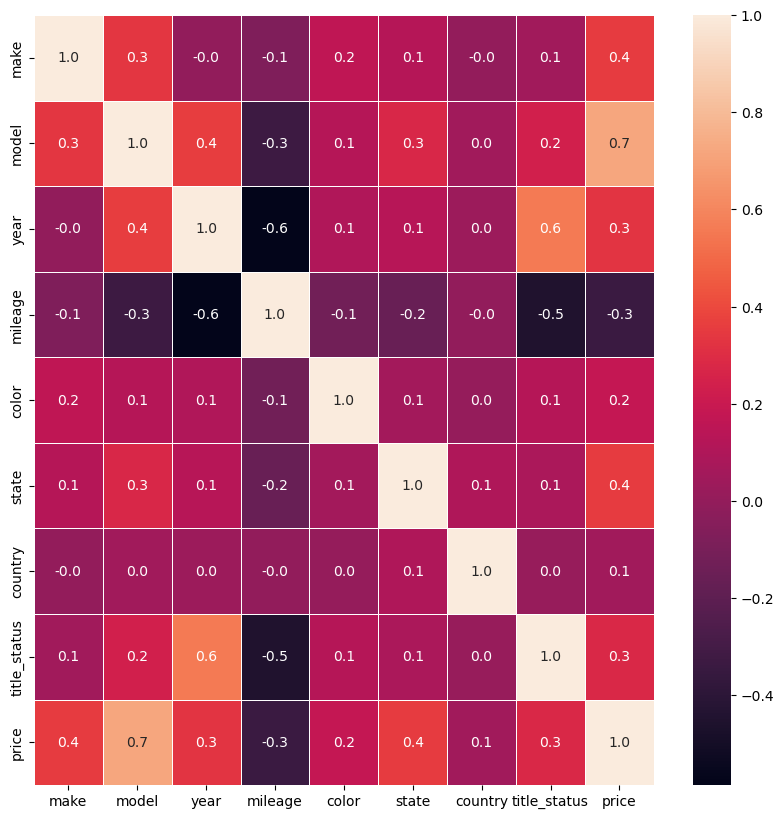

In [143]:
scaler = StandardScaler()

scaled_X_train = pd.DataFrame(scaler.fit_transform(train_set.drop('price',axis=1)), columns=X_train.columns)
scaled_X_train.index = train_set.index
scaled_X_test = pd.DataFrame(scaler.transform(test_set.drop('price',axis=1)), columns=X_test.columns)
scaled_X_test.index = test_set.index
scaled_train = pd.concat([scaled_X_train,train_set['price']],axis=1)
scaled_test = pd.concat([scaled_X_test,test_set['price']],axis=1)
X_train = scaled_train.drop('price',axis=1) 
y_train = scaled_train['price']
X_test = scaled_test.drop('price',axis=1)
y_test = scaled_test['price']

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(scaled_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

#### Linear Regression Model
A linear regression model is a statistical method used to model the relationship between a dependent variable and one or more independent variables.

In [144]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

In [145]:
# Compute regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = lr.score(X_test, y_test)

# Print regression metrics
print("MSE:", mse)
print("MAE:", mae)
print("R-squared:", r2)

MSE: 57401019.79783133
MAE: 5478.311391351182
R-squared: 0.5712719572755516


In [146]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(lr, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

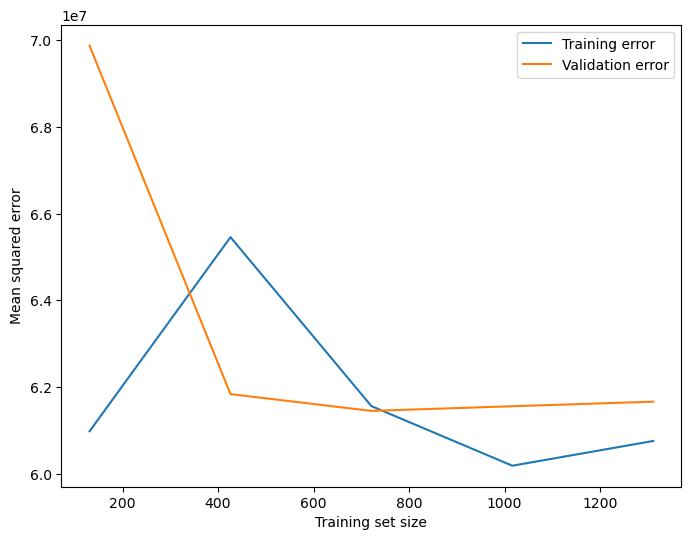

In [147]:
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.legend()
plt.show()

#### Random Forest Regression
Random forest regression combines the principles of ensemble learning with decision trees to build multiple decision tree regressors on random subsets of the training data. It then averages the predictions to improve accuracy and reduce overfitting

In [148]:
#Building the model
rf_model = RandomForestRegressor(max_depth=50, random_state=1)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the R-squared, MSE, and MAE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

R-squared: 0.7488
MSE: 33630954.0259
MAE: 3717.2160


In [149]:
y_pred

array([ 6305.9 , 16824.  ,  3508.55, 21474.4 , 28267.39, 23994.  ,
       45911.  , 10344.02, 22955.08,  9099.6 , 10402.  , 17684.  ,
        6870.5 , 21971.15, 19963.  , 22000.  , 14067.7 , 15259.  ,
        5137.05, 12766.5 , 11067.94, 16160.4 , 32435.11, 24119.16,
       10622.1 ,  7185.4 ,  6238.6 , 17665.  , 24408.82,  8323.45,
       13129.41,  8225.75,  6608.  , 22692.16, 10166.14,  4585.7 ,
       25564.  ,  7625.65, 20048.82, 23940.  , 24849.03, 47362.  ,
       12818.41,  5609.35, 28938.94, 27157.56, 30040.58, 45643.  ,
       26305.24,  7398.6 ,  4194.55, 23444.12,  9556.65, 42798.  ,
       22083.67, 17771.  , 28131.02, 28522.06,  9867.2 , 18569.55,
       11717.  , 29793.18, 10276.6 , 13546.3 , 17781.14, 18514.  ,
       36299.73,  9833.55, 15351.7 , 26984.02, 11234.75, 15375.1 ,
       24783.08, 13548.49, 29011.  , 15841.  ,  7175.8 ,  9282.2 ,
        7899.  , 27712.6 , 19520.  , 41930.  ,  7329.9 , 15045.1 ,
       14719.16, 13632.  , 21379.65,  8639.8 , 10869.06, 21047

In [150]:
import pickle

# Step 3: Define the file path where you want to save the model
data = {"model": rf_model}

# Step 4: Dump the trained model to a pickle file
with open('saved.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [151]:
import pickle

with open('saved.pkl', 'rb') as file:
    rf1 = pickle.load(file)

In [154]:
new_df = pd.DataFrame({
    'make':8,
    'model':7,
    'year' : 2017,
    'mileage' : 0.64000,
    'color' : 4,
    'state':4,
    'country':1,
    'title_status':1
}, index=[0])

In [155]:
rf1.predict(new_df)

array([40259.])

In [156]:
df4 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df4.head()

,Real Values,Predicted Values
53,7760,6305.90
2391,15900,16824.00
2310,2900,3508.55
728,29000,21474.40
850,29300,28267.39


In [157]:
#Building the model
from xgboost import XGBRegressor
XGB = XGBRegressor(n_estimators=500, max_depth=20, eta=0.1, subsample=0.7, colsample_bytree=0.8)
XGB.fit(X_train, y_train)

# Make predictions on the test set
y_pred = XGB.predict(X_test)

# Calculate the R-squared, MSE, and MAE
#from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

R-squared: 0.7353
MSE: 35443363.3528
MAE: 3942.8515


#### K-Neighbors Regressor
k Neighbors Regressor is a type of instance-based learning or lazy learning, where the model doesn't explicitly learn a function from the training data but instead memorizes the data and makes predictions based on similarity measures between new data points and the training instances

In [158]:
#Building the model
neigh = KNeighborsRegressor(n_neighbors=6)
neigh.fit(X_train, y_train)

# Make predictions on the test set
y_pred = neigh.predict(X_test)

# Calculate the R-squared, MSE, and MAE
#from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

R-squared: 0.6584
MSE: 45740850.4056
MAE: 4524.6497


From the above results, it is infered that Random Forest Regressor gives the best accuracy of 75% for predicting the price of the used cars.